### EDA

Importo las librerias a utilizar

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

Importo el archivo CSV y realizo un análisis inicial de la información.
Examinamos la tabla para realizar una rápida revisión de las variables numéricas en nuestro conjunto de datos.

In [3]:
dataframe = pd.read_csv('Df_Final.csv', low_memory=False)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52707 entries, 0 to 52706
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      52707 non-null  object 
 1   id                         52707 non-null  int64  
 2   Action                     52707 non-null  int64  
 3   Adventure                  52707 non-null  int64  
 4   Animation &amp; Modeling   52707 non-null  int64  
 5   Audio Production           52707 non-null  int64  
 6   Casual                     52707 non-null  int64  
 7   Design &amp; Illustration  52707 non-null  int64  
 8   Early Access               52707 non-null  int64  
 9   Education                  52707 non-null  int64  
 10  Free to Play               52707 non-null  int64  
 11  Indie                      52707 non-null  int64  
 12  Massively Multiplayer      52707 non-null  int64  
 13  Photo Editing              52707 non-null  int

In [6]:
dataframe['user_id'].head(40)

0               kube134
1     76561198030567998
2     76561198030567998
3     76561198030567998
4     76561198030567998
5     76561198030567998
6            jonasdbomb
7           washington_
8           washington_
9           washington_
10          washington_
11          washington_
12          washington_
13               Mastic
14               Mastic
15               Mastic
16               Mastic
17               Mastic
18               Mastic
19           advenger95
20           advenger95
21           advenger95
22    76561198003056556
23    76561198003056556
24    76561198085956238
25    76561198085956238
26    76561198085956238
27    76561198085956238
28           uradumbtit
29           uradumbtit
30    76561198020928326
31    76561198020928326
32    76561198020928326
33    76561198020928326
34            scroopy22
35            auzzie_96
36    76561198035363871
37              CHAAANG
38              CHAAANG
39    76561198084718144
Name: user_id, dtype: object

Primer vistazo general a los datos

In [7]:
dataframe.head(2)

,title,id,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,...,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,posted year,sentiment_score
0,Half-Life,70,1,0,0,0,0,0,0,0,...,http://steamcommunity.com/id/kube134,NaN,"Posted June 28, 2014.",NaN,251990.0,1 of 1 people (100%) found this review helpful,True,It's good to be a magical queen... if you surv...,2014.0,0
1,Half-Life,70,1,0,0,0,0,0,0,0,...,http://steamcommunity.com/profiles/76561198030...,2 people found this review funny,"Posted November 11, 2014.",NaN,332800.0,194 of 282 people (69%) found this review helpful,True,10/10 would take kids here for birthday,2014.0,0


Para obtener una interpretación más clara, voy a eliminar las columnas que contienen categorías en mi conjunto de datos con el fin de generar un mapa de calor

In [4]:
df_num = dataframe.select_dtypes(include = (int,float))
df_num.drop(columns=['Action', 'Adventure',
    'Audio Production', 'Casual', 'Design &amp; Illustration',
    'Early Access', 'Education', 'Free to Play', 'Indie', 'Animation &amp; Modeling',
    'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
    'Software Training', 'Sports', 'Strategy', 'Utilities',
    'Video Production', 'Web Publishing'], inplace=True)

In [5]:
dataframe.columns

Index(['title', 'id', 'Action', 'Adventure', 'Animation &amp; Modeling',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing', 'year', 'user_id', 'items_count',
       'steam_id', 'playtime_forever', 'playtime_2weeks', 'user_url', 'funny',
       'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review',
       'posted year', 'sentiment_score'],
      dtype='object')

Con el describe podemos ver un analisis rapido de los datos

In [7]:
df_num.describe()

,id,year,items_count,steam_id,playtime_forever,playtime_2weeks,item_id,posted year,sentiment_score
count,52707.000000,52707.000000,52707.000000,5.270700e+04,52707.000000,52707.000000,52682.000000,43522.000000,52707.000000
mean,5963.007418,2004.799628,146.406132,7.656120e+16,4638.936289,23.420039,170817.665066,2014.155508,0.327034
std,25881.730852,2.953082,233.530828,3.839649e+07,13890.877307,209.629254,132090.477195,0.843346,0.739334
min,10.000000,1990.000000,1.000000,7.656120e+16,0.000000,0.000000,10.000000,2010.000000,0.000000
25%,220.000000,2004.000000,55.000000,7.656120e+16,82.000000,0.000000,9480.000000,2014.000000,0.000000
50%,320.000000,2005.000000,95.000000,7.656120e+16,559.000000,0.000000,218230.000000,2014.000000,0.000000
75%,4000.000000,2006.000000,167.000000,7.656120e+16,2751.000000,0.000000,263020.000000,2015.000000,0.000000
max,339610.000000,2017.000000,7762.000000,7.656120e+16,356217.000000,9089.000000,527340.000000,2015.000000,2.000000


## Mapa de Correlacion

Con este heatmap trato de encontrar alguna relacion entre las variables numericas

<Axes: >

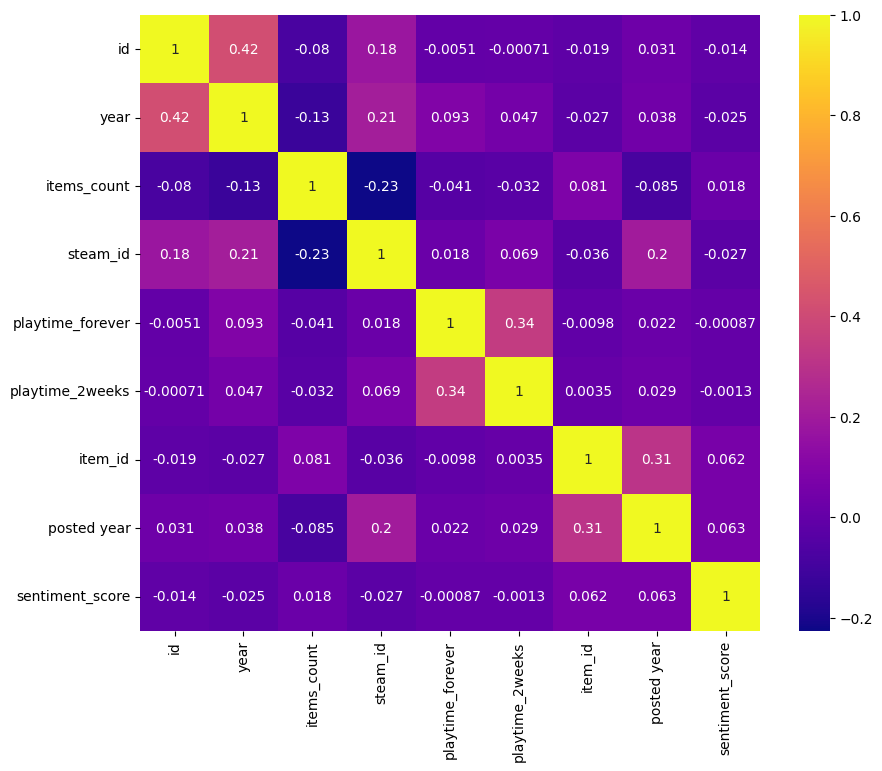

In [8]:
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

Conclusión: No parece haber una conexión fuerte entre los elementos. Cada columna simplemente hace su propia cosa, sin tener mucha relación con las demás

## Top de Juegos

El top de juegos con reviews entre los usuarios de nuestro dataset

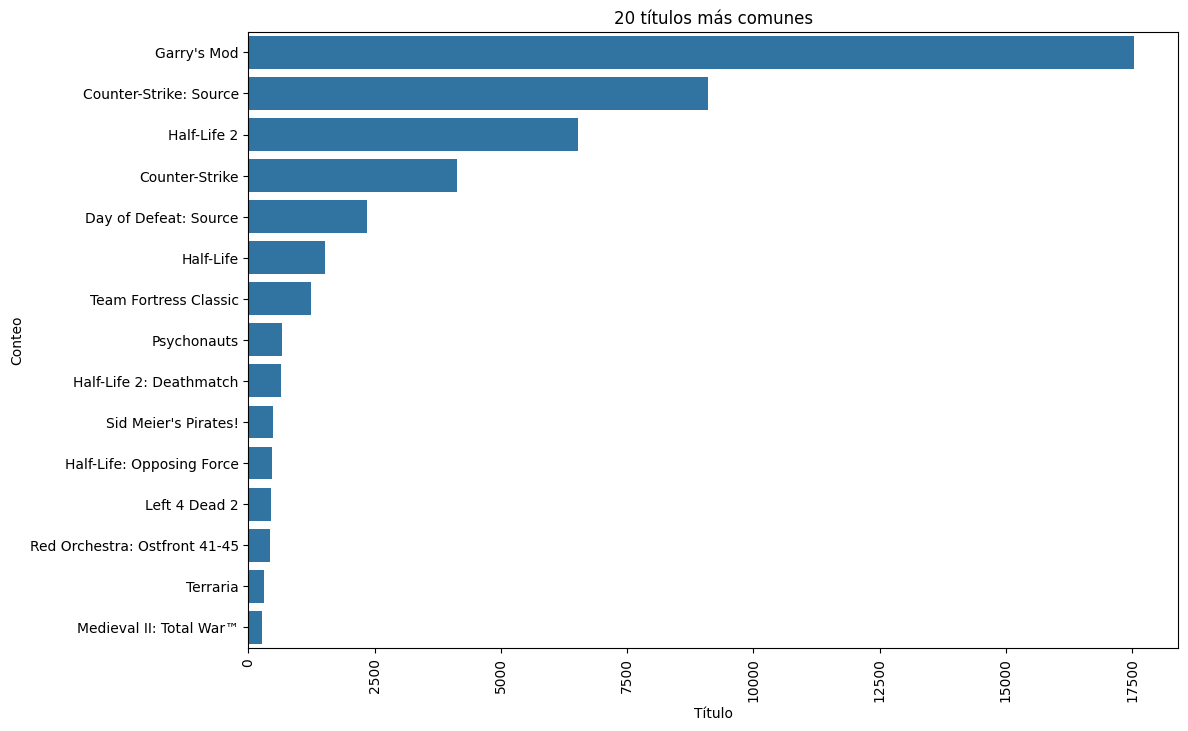

In [9]:
### Obtengo los 20 títulos más comunes ###
top_titles = dataframe['title'].value_counts().nlargest(15)

### Creo el gráfico de barras ###
plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('20 títulos más comunes')
plt.xticks(rotation=90)
plt.show()

Conclusion: Garry's Mod, Counter Strike y Half Life 2 son los juegos más adquiridos según la preferencia de los usuarios, ya que representan el mayor porcentaje de las compras.

## Dispersion de horas de Juego vs Años

Una revisión global para destacar los años en los que cada usuario dedicó la mayor cantidad de horas a jugar

Text(0, 0.5, 'Año')

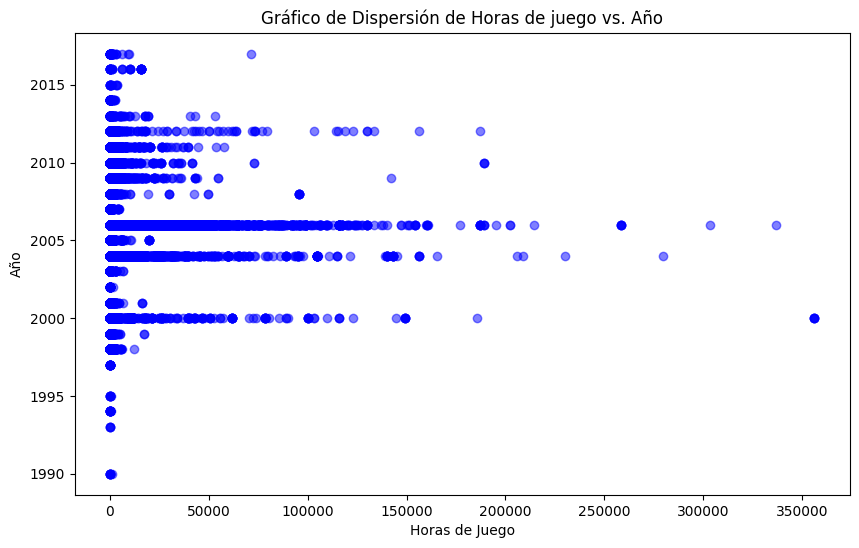

In [10]:
plt.figure(figsize=(10, 6))

### Creo el scatter plot de playtime vs. price ###
plt.scatter(df_num['playtime_forever'], df_num['year'], color='blue', alpha=0.5)

### Personalizo el gráfico con etiquetas y título ###
plt.title('Gráfico de Dispersión de Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año')

## Sentiment Score por Año

Muestra cómo la aplicación realiza un conteo anual de las revisiones publicadas

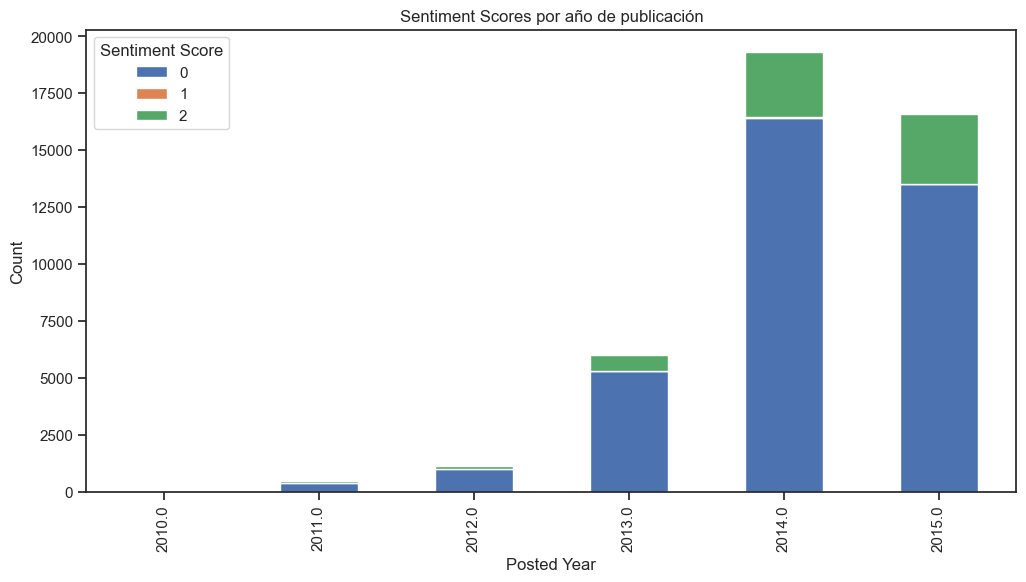

In [12]:
### Agrupe los datos por 'posted year' y 'sentiment_score' y cuento las ocurrencias ###
grouped_data = dataframe.groupby(['posted year', 'sentiment_score']).size().reset_index(name='count')

### Roto los datos para tener 'sentiment_score' como columnas ###
pivot_data = grouped_data.pivot(index='posted year', columns='sentiment_score', values='count')

### Se trazan los datos agrupados ###
sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Posted Year')
plt.ylabel('Count')
plt.title('Sentiment Scores por año de publicación')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()

Conclusion: Viendo las reviews con nuestro sentiment score, parece que la mayoría son positivas, sobre todo en 2014 y 2015. Pero cuando aplicamos nuestra función para clasificarlas, apenas hay algunas neutrales que casi no se notan en el gráfico